Found 12750 validated image filenames belonging to 3 classes.
Found 2250 validated image filenames belonging to 3 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1756951505.734516     125 service.cc:148] XLA service 0x7cad94004ce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756951505.735700     125 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1756951507.188341     125 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1756951511.324243     125 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


399/399 - 262s - 656ms/step - accuracy: 0.3253 - loss: 1.3424 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 2/10
399/399 - 178s - 445ms/step - accuracy: 0.3329 - loss: 1.0987 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 3/10
399/399 - 176s - 441ms/step - accuracy: 0.3291 - loss: 1.1047 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 4/10
399/399 - 176s - 442ms/step - accuracy: 0.3304 - loss: 1.0987 - val_accuracy: 0.3333 - val_loss: 1.0986
ResNet50 Val Accuracy: 33.33%


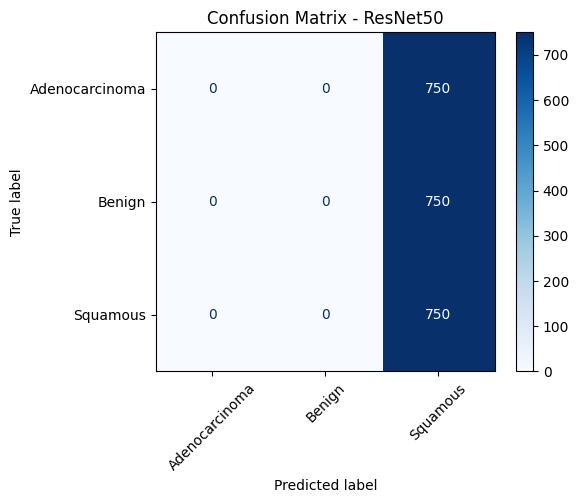

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
399/399 - 196s - 491ms/step - accuracy: 0.8391 - loss: 0.3820 - val_accuracy: 0.9396 - val_loss: 0.1530
Epoch 2/10
399/399 - 180s - 451ms/step - accuracy: 0.8863 - loss: 0.2704 - val_accuracy: 0.9578 - val_loss: 0.1110
Epoch 3/10
399/399 - 183s - 459ms/step - accuracy: 0.8919 - loss: 0.2567 - val_accuracy: 0.9307 - val_loss: 0.1483
Epoch 4/10
399/399 - 183s - 458ms/step - accuracy: 0.8955 - loss: 0.2414 - val_accuracy: 0.9480 - val_loss: 0.1261
Epoch 5/10
399/399 - 181s - 455ms/step - accuracy: 0.9010 - loss: 0.2258 - val_accuracy: 0.9569 - val_loss: 0.1140
VGG16 Val Accuracy: 95.78%


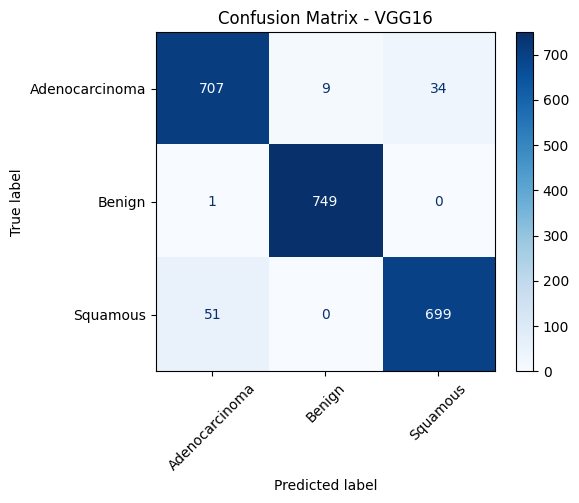

Epoch 1/10
399/399 - 240s - 602ms/step - accuracy: 0.8412 - loss: 0.5816 - val_accuracy: 0.9431 - val_loss: 0.1487
Epoch 2/10
399/399 - 178s - 447ms/step - accuracy: 0.8905 - loss: 0.2634 - val_accuracy: 0.9511 - val_loss: 0.1130
Epoch 3/10
399/399 - 186s - 466ms/step - accuracy: 0.9033 - loss: 0.2286 - val_accuracy: 0.9578 - val_loss: 0.1056
Epoch 4/10
399/399 - 180s - 452ms/step - accuracy: 0.9169 - loss: 0.2194 - val_accuracy: 0.9516 - val_loss: 0.1193
Epoch 5/10
399/399 - 182s - 455ms/step - accuracy: 0.9190 - loss: 0.2044 - val_accuracy: 0.9516 - val_loss: 0.0966
Epoch 6/10
399/399 - 190s - 477ms/step - accuracy: 0.9260 - loss: 0.1909 - val_accuracy: 0.9569 - val_loss: 0.1108
Epoch 7/10
399/399 - 183s - 458ms/step - accuracy: 0.9274 - loss: 0.1888 - val_accuracy: 0.9378 - val_loss: 0.1220
Epoch 8/10
399/399 - 184s - 461ms/step - accuracy: 0.9278 - loss: 0.1890 - val_accuracy: 0.9480 - val_loss: 0.1270
DenseNet121 Val Accuracy: 95.16%


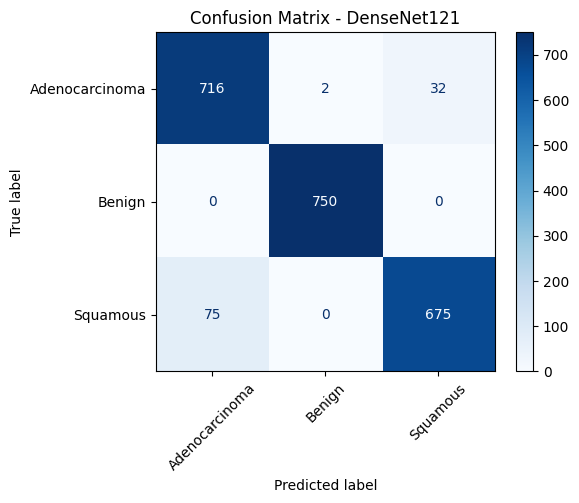

In [29]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, backend as K
from tensorflow.keras.applications import ResNet50, VGG16, DenseNet121
from tensorflow.keras.callbacks import EarlyStopping

ROOT = "/kaggle/input/lung-and-colon-cancer-histopathological-images"
CANDIDATES = [
    os.path.join(ROOT, "lung_colon_image_set", "lung_image_sets"),
    os.path.join(ROOT, "lung_colon_image_set"),
]
SEED = 1337
IMG_SIZE = (224, 224)
BATCH = 32
EPOCHS = 10
tf.random.set_seed(SEED); np.random.seed(SEED)

targets = ["lung_aca","lung_n","lung_scc"]
BASE_DIR = None
for cand in CANDIDATES:
    if all(os.path.isdir(os.path.join(cand, t)) for t in targets):
        if all(len(glob.glob(os.path.join(cand, t, "*.*"))) > 0 for t in targets):
            BASE_DIR = cand
            break
assert BASE_DIR is not None, "No found lung folders. Add dataset."

filepaths, labels = [], []
for cls in targets:
    files = sorted(glob.glob(os.path.join(BASE_DIR, cls, "*.*")))
    filepaths += files
    labels += [cls]*len(files)
df = pd.DataFrame({"filepath": filepaths, "label": labels})
assert len(df) > 0, "No images."

train_df, val_df = train_test_split(df, test_size=0.15, random_state=SEED, stratify=df["label"])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(
    train_df, x_col="filepath", y_col="label",
    target_size=IMG_SIZE, class_mode="categorical",
    batch_size=BATCH, shuffle=True, seed=SEED
)
val_gen = val_datagen.flow_from_dataframe(
    val_df, x_col="filepath", y_col="label",
    target_size=IMG_SIZE, class_mode="categorical",
    batch_size=BATCH, shuffle=False
)

class_indices = train_gen.class_indices
class_labels = [k for k,_ in sorted(class_indices.items(), key=lambda x:x[1])]
pretty = {"lung_aca":"Adenocarcinoma","lung_n":"Benign","lung_scc":"Squamous"}
display_labels = [pretty[c] for c in class_labels]

def build_model(base_model_func, name):
    base = base_model_func(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    base.trainable = False
    model = models.Sequential([
        base,
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(class_labels), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model, name

models_list = [
    (ResNet50, "ResNet50"),
    (VGG16, "VGG16"),
    (DenseNet121, "DenseNet121")
]

for base_func, name in models_list:
    model, _ = build_model(base_func, name)
    cb = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(train_gen, epochs=EPOCHS, validation_data=val_gen, callbacks=[cb], verbose=2)
    
    val_gen.reset()
    loss, acc = model.evaluate(val_gen, verbose=0)
    print(f"{name} Val Accuracy: {acc*100:.2f}%")
    
    val_gen.reset()
    y_pred = np.argmax(model.predict(val_gen, verbose=0), axis=1)
    y_true = val_gen.classes
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=display_labels).plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout(); plt.show()
    K.clear_session()

Found 12750 validated image filenames belonging to 3 classes.
Found 2250 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
399/399 - 201s - 503ms/step - accuracy: 0.8661 - loss: 1.1382 - val_accuracy: 0.9431 - val_loss: 0.1501
Epoch 2/10
399/399 - 182s - 457ms/step - accuracy: 0.8971 - loss: 0.2848 - val_accuracy: 0.9507 - val_loss: 0.1148
Epoch 3/10
399/399 - 182s - 455ms/step - accuracy: 0.9099 - loss: 0.2398 - val_accuracy: 0.9573 - val_loss: 0.1077
Epoch 4/10
399/399 - 182s - 455ms/step - accuracy: 0.9227 - loss: 0.2145 - val_accuracy: 0.9596 - val_loss: 0.1175
Epoch 5/10
399/399 - 182s - 457ms/step - accuracy: 0.9324 - loss: 0.1987 - val_accuracy: 0.9573 - val_loss: 0.1044
Epoch 6/10
399/399 - 182s - 456ms/step - accuracy: 0.9319 - loss: 0.1824 - val_accuracy: 0.9591 - val_loss: 0.1050
Epoch 7/10
399/399 - 179s - 449ms/step - accuracy: 0.9300 - loss: 0.1849 - val_accuracy: 0.9556 - val_loss: 0.0885
Epoch 8/10
399/399 - 181s - 453ms/step - accuracy: 0.9329 - loss: 0.1904 - val_accuracy: 0.9582 - val_loss: 0.0906
Epoch 9/10
399/399 - 179s - 449ms/step - accuracy: 0.9358 - loss: 0.1740 - val_a

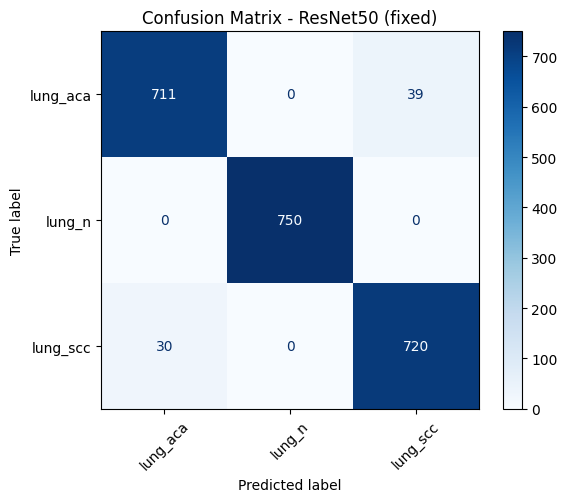

In [30]:
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, backend as K
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np, matplotlib.pyplot as plt

VAL_SPLIT = globals().get('VAL_SPLIT', 0.15)
IMG_SIZE   = globals().get('IMG_SIZE', (224,224))
BATCH      = globals().get('BATCH', 32)
SEED       = globals().get('SEED', 1337)

use_df  = ('train_df' in globals()) and ('val_df' in globals())
use_dir = ('train_generator' in globals()) and ('val_generator' in globals())

if use_df:
    res_train_gen = ImageDataGenerator(
        preprocessing_function=resnet_preprocess,
        rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
        shear_range=0.2, zoom_range=0.2, horizontal_flip=True
    )
    res_val_gen = ImageDataGenerator(preprocessing_function=resnet_preprocess)
    res_train = res_train_gen.flow_from_dataframe(
        train_df, x_col="filepath", y_col="label",
        target_size=IMG_SIZE, class_mode="categorical",
        batch_size=BATCH, shuffle=True, seed=SEED
    )
    res_val = res_val_gen.flow_from_dataframe(
        val_df, x_col="filepath", y_col="label",
        target_size=IMG_SIZE, class_mode="categorical",
        batch_size=BATCH, shuffle=False
    )
    class_labels = [k for k,_ in sorted(res_train.class_indices.items(), key=lambda x:x[1])]
elif use_dir:
    base_path = getattr(train_generator, 'directory', None)
    if base_path is None:
        base_path = globals().get('BASE_DIR', globals().get('base_dir', None))
    assert base_path is not None
    class_labels = [k for k,_ in sorted(train_generator.class_indices.items(), key=lambda x:x[1])]
    res_train_gen = ImageDataGenerator(
        preprocessing_function=resnet_preprocess,
        rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
        shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
        validation_split=VAL_SPLIT
    )
    res_val_gen = ImageDataGenerator(
        preprocessing_function=resnet_preprocess,
        validation_split=VAL_SPLIT
    )
    res_train = res_train_gen.flow_from_directory(
        base_path, target_size=IMG_SIZE, class_mode='categorical',
        classes=class_labels, subset='training',
        batch_size=BATCH, shuffle=True, seed=SEED
    )
    res_val = res_val_gen.flow_from_directory(
        base_path, target_size=IMG_SIZE, class_mode='categorical',
        classes=class_labels, subset='validation',
        batch_size=BATCH, shuffle=False, seed=SEED
    )
else:
    raise AssertionError

base = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
base.trainable = False
model_res = models.Sequential([
    base,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_labels), activation='softmax')
])
model_res.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cb = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model_res.fit(res_train, epochs=10, validation_data=res_val, callbacks=[cb], verbose=2)

res_val.reset()
loss, acc = model_res.evaluate(res_val, verbose=0)
print(f"ResNet50 (fixed) - Val Accuracy: {acc*100:.2f}%")

res_val.reset()
y_pred = np.argmax(model_res.predict(res_val, verbose=0), axis=1)
y_true = res_val.classes
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=class_labels).plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix - ResNet50 (fixed)")
plt.tight_layout(); plt.show()
K.clear_session()

Found 12750 validated image filenames belonging to 3 classes.
Found 2250 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
399/399 - 186s - 467ms/step - accuracy: 0.8144 - loss: 1.1336 - val_accuracy: 0.9338 - val_loss: 0.1826
Epoch 2/10
399/399 - 177s - 444ms/step - accuracy: 0.8754 - loss: 0.3183 - val_accuracy: 0.9436 - val_loss: 0.1717
Epoch 3/10
399/399 - 182s - 456ms/step - accuracy: 0.8958 - loss: 0.2837 - val_accuracy: 0.9502 - val_loss: 0.1293
Epoch 4/10
399/399 - 182s - 457ms/step - accuracy: 0.8980 - loss: 0.2683 - val_accuracy: 0.9293 - val_loss: 0.1592
Epoch 5/10
399/399 - 180s - 451ms/step - accuracy: 0.8995 - loss: 0.2673 - val_accuracy: 0.9556 - val_loss: 0.1135
Epoch 6/10
399/399 - 179s - 448ms/step - accuracy: 0.9093 - loss: 0.2396 - val_accuracy: 0.9564 - val_loss: 0.1231
Epoch 7/10
399/399 - 181s - 455ms/step - accuracy: 0.9160 - loss: 0.2203 - val_accuracy: 0.9511 - val_loss: 0.1301
Epoch 8/10
399/399 - 184s - 462ms/step - accuracy: 0.9066 - loss: 0.2274 - val_accuracy: 0.9631 - val_loss: 0.1043
Epoch 9/10
399/399 - 185s - 463ms/step - accuracy: 0.9090 - loss: 0.2328 - val_a

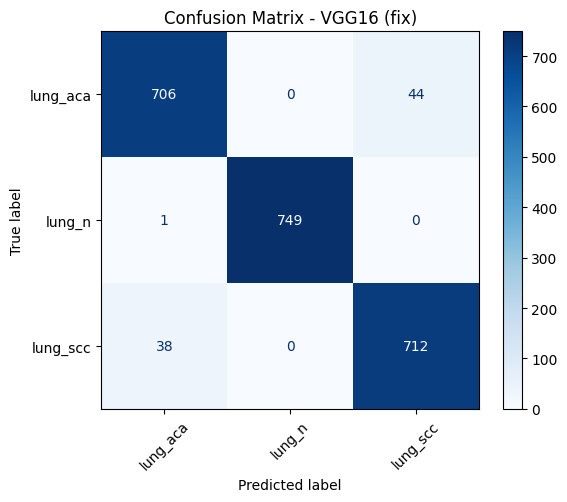

In [31]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, backend as K
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np, matplotlib.pyplot as plt

VAL_SPLIT = globals().get('VAL_SPLIT', 0.15)
IMG_SIZE   = globals().get('IMG_SIZE', (224,224))
BATCH      = globals().get('BATCH', 32)
SEED       = globals().get('SEED', 1337)

use_df  = ('train_df' in globals()) and ('val_df' in globals())
use_dir = ('train_generator' in globals()) and ('val_generator' in globals())

if use_df:
    vgg_train_gen = ImageDataGenerator(
        preprocessing_function=vgg_preprocess,
        rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
        shear_range=0.2, zoom_range=0.2, horizontal_flip=True
    )
    vgg_val_gen = ImageDataGenerator(preprocessing_function=vgg_preprocess)
    vgg_train = vgg_train_gen.flow_from_dataframe(
        train_df, x_col="filepath", y_col="label",
        target_size=IMG_SIZE, class_mode="categorical",
        batch_size=BATCH, shuffle=True, seed=SEED
    )
    vgg_val = vgg_val_gen.flow_from_dataframe(
        val_df, x_col="filepath", y_col="label",
        target_size=IMG_SIZE, class_mode="categorical",
        batch_size=BATCH, shuffle=False
    )
    class_labels = [k for k,_ in sorted(vgg_train.class_indices.items(), key=lambda x:x[1])]
elif use_dir:
    base_path = getattr(train_generator, 'directory', None) or globals().get('BASE_DIR', globals().get('base_dir', None))
    assert base_path is not None
    class_labels = [k for k,_ in sorted(train_generator.class_indices.items(), key=lambda x:x[1])]
    vgg_train_gen = ImageDataGenerator(
        preprocessing_function=vgg_preprocess,
        rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
        shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
        validation_split=VAL_SPLIT
    )
    vgg_val_gen = ImageDataGenerator(preprocessing_function=vgg_preprocess, validation_split=VAL_SPLIT)
    vgg_train = vgg_train_gen.flow_from_directory(
        base_path, target_size=IMG_SIZE, class_mode='categorical',
        classes=class_labels, subset='training', batch_size=BATCH, shuffle=True, seed=SEED
    )
    vgg_val = vgg_val_gen.flow_from_directory(
        base_path, target_size=IMG_SIZE, class_mode='categorical',
        classes=class_labels, subset='validation', batch_size=BATCH, shuffle=False, seed=SEED
    )
else:
    raise AssertionError

base_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
base_vgg.trainable = False
model_vgg = models.Sequential([base_vgg, layers.Flatten(), layers.Dense(128, activation='relu'), layers.Dropout(0.5), layers.Dense(len(class_labels), activation='softmax')])
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cb = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_vgg.fit(vgg_train, epochs=10, validation_data=vgg_val, callbacks=[cb], verbose=2)

vgg_val.reset()
loss, acc = model_vgg.evaluate(vgg_val, verbose=0)
print(f"VGG16 (fix) - Val Accuracy: {acc*100:.2f}%")
vgg_val.reset()
y_pred = np.argmax(model_vgg.predict(vgg_val, verbose=0), axis=1)
y_true = vgg_val.classes
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=class_labels).plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix - VGG16 (fix)"); plt.tight_layout(); plt.show()
K.clear_session()


Found 12750 validated image filenames belonging to 3 classes.
Found 2250 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
399/399 - 230s - 577ms/step - accuracy: 0.8448 - loss: 0.6952 - val_accuracy: 0.9413 - val_loss: 0.1410
Epoch 2/10
399/399 - 182s - 457ms/step - accuracy: 0.8757 - loss: 0.2870 - val_accuracy: 0.9409 - val_loss: 0.1422
Epoch 3/10
399/399 - 182s - 455ms/step - accuracy: 0.9079 - loss: 0.2263 - val_accuracy: 0.9480 - val_loss: 0.1418
Epoch 4/10
399/399 - 182s - 456ms/step - accuracy: 0.9118 - loss: 0.2130 - val_accuracy: 0.9600 - val_loss: 0.1073
Epoch 5/10
399/399 - 181s - 454ms/step - accuracy: 0.9173 - loss: 0.1981 - val_accuracy: 0.9622 - val_loss: 0.0925
Epoch 6/10
399/399 - 186s - 466ms/step - accuracy: 0.9165 - loss: 0.2101 - val_accuracy: 0.9600 - val_loss: 0.0991
Epoch 7/10
399/399 - 183s - 460ms/step - accuracy: 0.9213 - loss: 0.1997 - val_accuracy: 0.9587 - val_loss: 0.1102
Epoch 8/10
399/399 - 183s - 459ms/step - accuracy: 0.9229 - loss: 0.1916 - val_accuracy: 0.9604 - val_loss: 0.0994
DenseNet121 (fix) - Val Accuracy: 96.22%


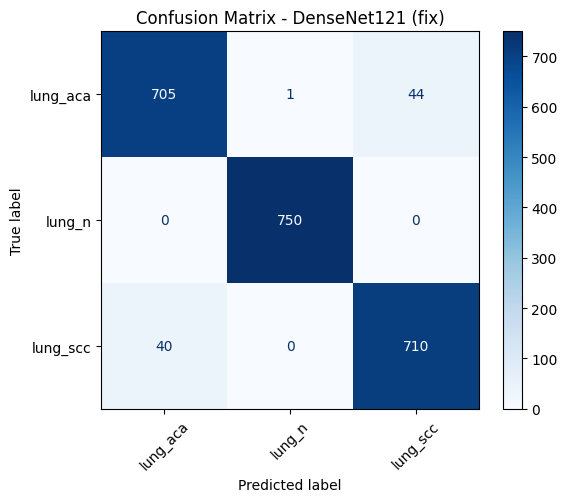

In [32]:
from tensorflow.keras.applications.densenet import preprocess_input as dense_preprocess, DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, backend as K
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np, matplotlib.pyplot as plt

VAL_SPLIT = globals().get('VAL_SPLIT', 0.15)
IMG_SIZE   = globals().get('IMG_SIZE', (224,224))
BATCH      = globals().get('BATCH', 32)
SEED       = globals().get('SEED', 1337)

use_df  = ('train_df' in globals()) and ('val_df' in globals())
use_dir = ('train_generator' in globals()) and ('val_generator' in globals())

if use_df:
    dn_train_gen = ImageDataGenerator(
        preprocessing_function=dense_preprocess,
        rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
        shear_range=0.2, zoom_range=0.2, horizontal_flip=True
    )
    dn_val_gen = ImageDataGenerator(preprocessing_function=dense_preprocess)
    dn_train = dn_train_gen.flow_from_dataframe(
        train_df, x_col="filepath", y_col="label",
        target_size=IMG_SIZE, class_mode="categorical",
        batch_size=BATCH, shuffle=True, seed=SEED
    )
    dn_val = dn_val_gen.flow_from_dataframe(
        val_df, x_col="filepath", y_col="label",
        target_size=IMG_SIZE, class_mode="categorical",
        batch_size=BATCH, shuffle=False
    )
    class_labels = [k for k,_ in sorted(dn_train.class_indices.items(), key=lambda x:x[1])]
elif use_dir:
    base_path = getattr(train_generator, 'directory', None) or globals().get('BASE_DIR', globals().get('base_dir', None))
    assert base_path is not None
    class_labels = [k for k,_ in sorted(train_generator.class_indices.items(), key=lambda x:x[1])]
    dn_train_gen = ImageDataGenerator(
        preprocessing_function=dense_preprocess,
        rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
        shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
        validation_split=VAL_SPLIT
    )
    dn_val_gen = ImageDataGenerator(preprocessing_function=dense_preprocess, validation_split=VAL_SPLIT)
    dn_train = dn_train_gen.flow_from_directory(
        base_path, target_size=IMG_SIZE, class_mode='categorical',
        classes=class_labels, subset='training', batch_size=BATCH, shuffle=True, seed=SEED
    )
    dn_val = dn_val_gen.flow_from_directory(
        base_path, target_size=IMG_SIZE, class_mode='categorical',
        classes=class_labels, subset='validation', batch_size=BATCH, shuffle=False, seed=SEED
    )
else:
    raise AssertionError

base_dense = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
base_dense.trainable = False
model_dense = models.Sequential([base_dense, layers.Flatten(), layers.Dense(128, activation='relu'), layers.Dropout(0.5), layers.Dense(len(class_labels), activation='softmax')])
model_dense.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cb = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_dense.fit(dn_train, epochs=10, validation_data=dn_val, callbacks=[cb], verbose=2)

dn_val.reset()
loss, acc = model_dense.evaluate(dn_val, verbose=0)
print(f"DenseNet121 (fix) - Val Accuracy: {acc*100:.2f}%")
dn_val.reset()
y_pred = np.argmax(model_dense.predict(dn_val, verbose=0), axis=1)
y_true = dn_val.classes
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=class_labels).plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix - DenseNet121 (fix)"); plt.tight_layout(); plt.show()
K.clear_session()
